***Example 1:***
We want to predict the speed of car in 101 highway based on the time of the day. A camera in the highway has recorded the following data for 20 cars during a day. The suggested model represented as
$$
h_\theta(x) = 70+ \theta_0 sin(\theta_1 x)
$$
where x is the time of the day. To make it easier, I reprsented x with hour units started from mid-night. So $1.5$ means 1 hour and 30 mintues after midnight.The data set is as follow:

<IPython.core.display.Javascript object>


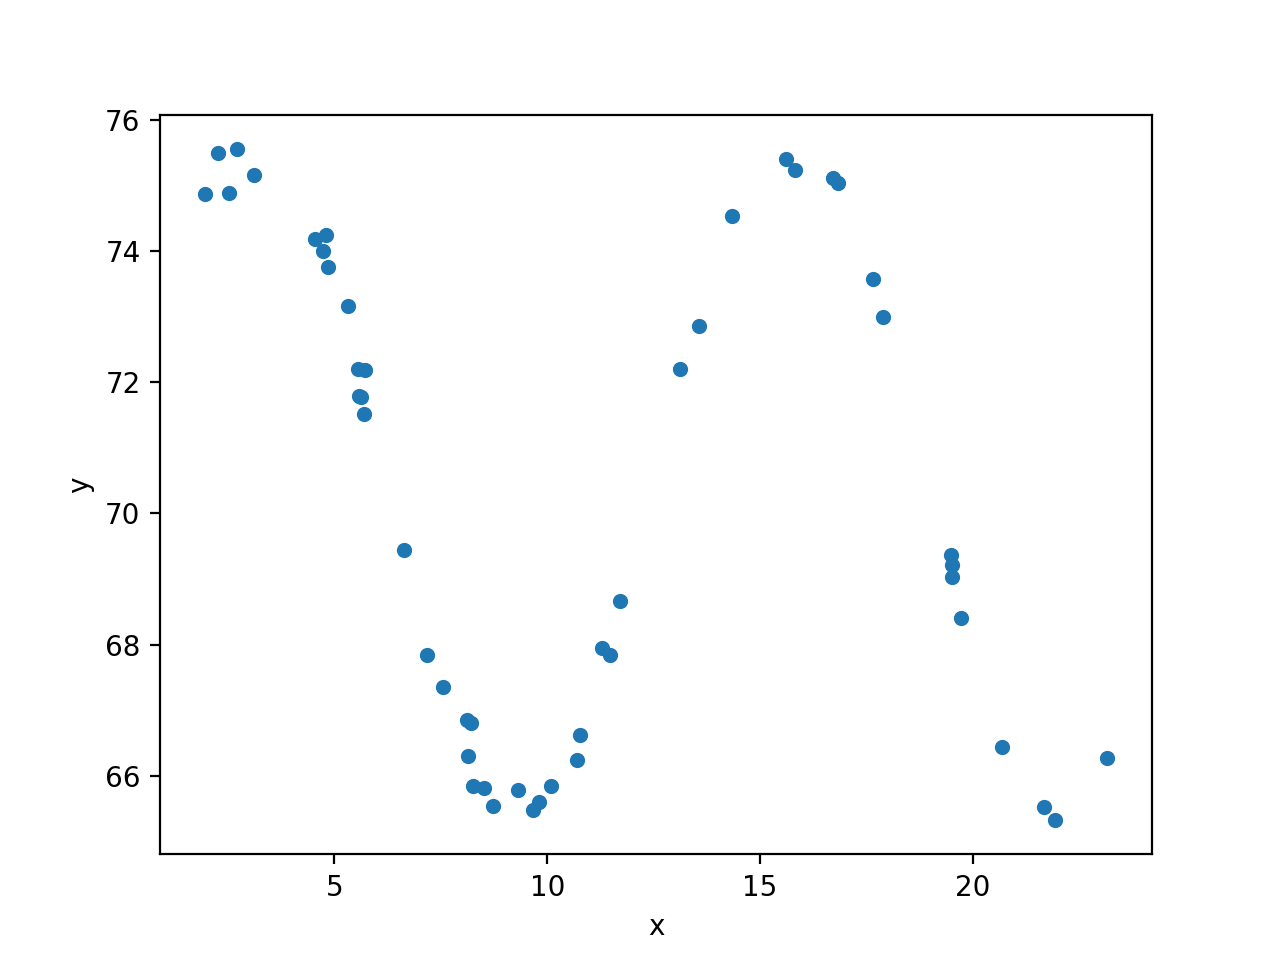

In [38]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


df = pd.read_excel('./highway_trafic/Book1.xlsx')
df
df.plot(kind='scatter', x='x', y='y')



We first compare two different prediction models, M1 and M2. In model M1, we choose
$$
\theta_0 = 10, \theta_1 =.3
$$
and in M2 we have $\theta_0 = 6, \theta_1 =.4$. First, let's check the prediction of these two models for the speed of the car at $x= 2.26065$. Model M1, will predict the speed of the car is 
$$y = 75.505481, 
x= 2.26065$$

$$\hat y_1 = 70 + 10*sin(.3 * 2.26065) = 76.27$$
, and Model M2 predicts that as

$$\hat y_2 = 70 + 6*sin(.4 * 2.26065) = 74.7158$$

The correct speed was $y = 75.505481$. So the prediction error in M1 is $y-\hat y_1 = -0.7684$ and error for M2 is $y-\hat y_2 = -0.789673$


In [21]:
import math 
y = 75.505481
x= 2.26065
y1=70 + 10*math.sin(.3 * 2.26065)
y2=70 + 6*math.sin(.4 * 2.26065)
print((y,y1,y2) )
print('Error M1:  '+str(y-y1))
print('Error M2:  '+str(y-y2))

(75.505481, 76.27388481711822, 74.71580711405225)
Error M1:  -0.768403817118
Error M2:  0.789673885948


We can do the same error calcultions for all other values of x.

In [44]:
df['M1'] = 70+10*np.sin(df['x']*.3)
df['M2'] = 70+6*np.sin(df['x']*.4)
df['Error M1'] = df['y'] - df['M1']
df['Error M2'] = df['y'] - df['M2']

df.head()

,x,y,M1,M2,Error M1,Error M2
0,1.966973,74.881738,75.564374,74.248538,-0.682636,0.633200
1,2.260659,75.505481,76.273906,74.715820,-0.768425,0.789661
2,2.535037,74.892121,76.892918,75.093762,-2.000797,-0.201641
3,2.703667,75.558847,77.250453,75.295889,-1.691606,0.262958
4,3.112052,75.167692,78.037762,75.684033,-2.870070,-0.516341


<IPython.core.display.Javascript object>


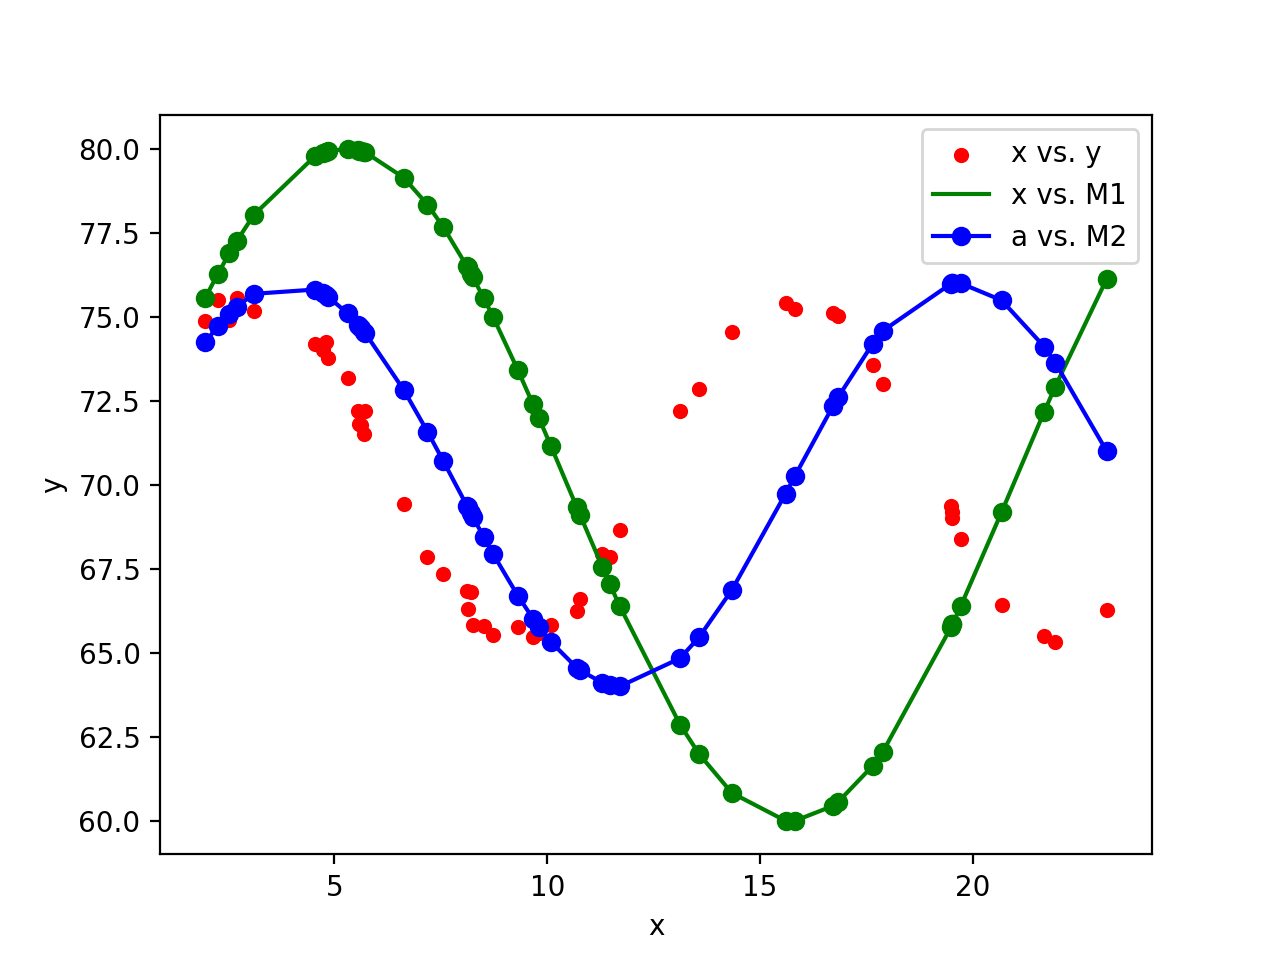

In [49]:
ax1 = df.plot(kind='scatter', x='x', y='y', color='r', label="x vs. y")    
ax2 = df.plot(kind='line', x='x', y='M1', color='g', marker = 'o', ax=ax1, label="x vs. M1")    
ax3 = df.plot(kind='line', x='x', y='M2', color='b',marker = 'o', ax=ax1, label="a vs. M2")

Which of these two models are provideing a better predicition for y? Intuitively, a model is better if it has smaller predicition error on average. Therefore, we compare models by looking at the mean (average) squere error. 
Here we comput the mean squere error (MSE) of M1 and M2. Mean squer error for M1 is 68.055 and MSE for M2 is 17.59. So the predicition error of model M2 is smaller on average. So it is a better model.

In [55]:
MSE1 = (df['Error M1']**2).mean()
MSE2 = (df['Error M2']**2).mean()
print(MSE1, MSE2)

(68.05555771653394, 17.593595922927204)


This MSE is cost function of parameters $\theta_0,\theta_1$. Recall that the cost function is defined 

$$J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^m (y_i-\hat y^1_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i-(70 +\theta_0 \sin(\theta_1 x))^2$$

In fact the above calculation shows that $J(10,0.3) = 68.055$ and $J(6,0.4) = 17.59$. So we the model M2 is a better model since it has a smaller cost function (which is in fact the MSE of M1). The cost function can be calculte again by

In [58]:
J1 =((df['y']-df['M1'])**2).sum()/len(df)
print(J1)

68.05555771653394


**Question: Why do we use square in defintion of cost function?**
**Answer:** Some of the errors are positve and some of them are negative. We use squre error to make every thing positive. Also, we can compute the derivate of cost function easily (which appear in gradient descent).

**Question: Compare the mean square error v.s mean absolute error**
**Answer**  The other alternative for cost function is mean absoulte error. In that case cost function is not differentiable any more. However, it reduce the effect of outliers. (it is similar to compareing the mode and mean)


### stochastic Gradient descent

As we discussed, we are looking for parameters $\theta_0$ and $\theta_1$ for which 
$$J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^m (y_i-\hat y^1_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i-(70 +\theta_0 \sin(\theta_1 x))^2$$
is minimum. Gradient descent is a method to calculte the minimum of a function. 


Note that
$$\frac{\partial J}{\partial \theta_0} (\theta_0,\theta_1) =  \frac{1}{m} \sum_{i=1}^m - 2(y_i-(70 +\theta_0 \sin(\theta_1 x_i)) \cdot \sin(\theta_1 x_i)$$
$$\frac{\partial J}{\partial \theta_1} (\theta_0,\theta_1) =  \frac{1}{m} \sum_{i=1}^m - 2(y_i-(70 +\theta_0 \sin(\theta_1 x_i)))\cdot x_i \cdot \theta_0\cos(\theta_1 x)$$

Here $\frac{\partial J}{\partial \theta_1} (\theta_0,\theta_1)$ is partial derivative with respect to $\theta_1$ and $\sum_{i=1}^m$ is sumation over all ....

<IPython.core.display.Javascript object>


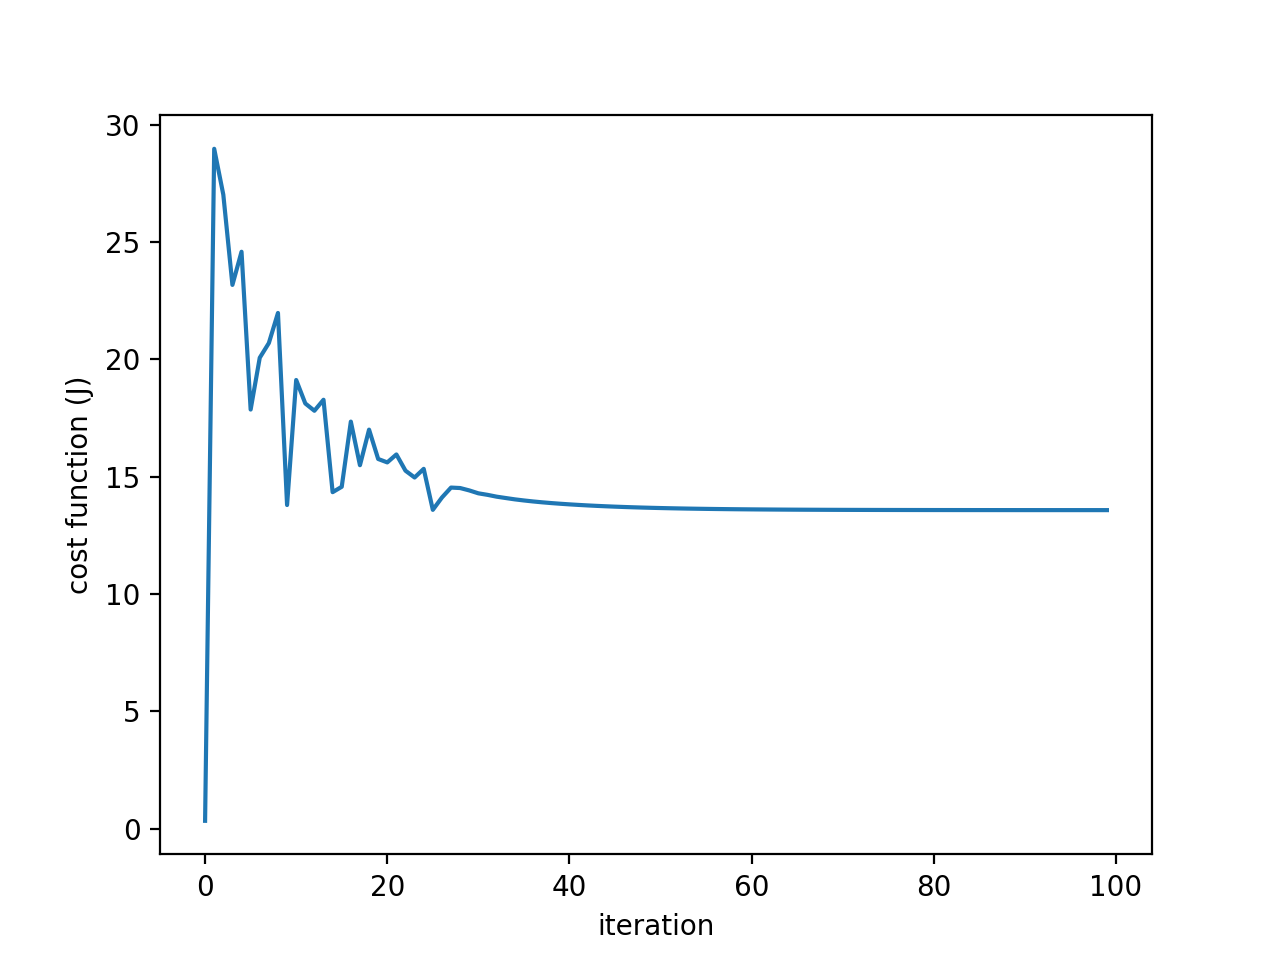

In [107]:
X = np.array(df['x'])
Y = np.array(df['y'])

def DJ(theta0,theta1):
    '''
       compute the partial derivatives
    '''
    e = Y - (70+theta0*np.sin(theta1*X))
    J = (e**2).mean()
    d0 = -(2 * e * np.sin(theta1*X)).mean()
    d1 = -(2 * e * theta0 * np.cos(theta1*X) * X ).mean()
    return J, d0,d1

def SGD():
    theta0, theta1 =5 ,.5  # intial point
    a = .05  # learning rate
    cost = []
    for i in range(100):
        J, d0,d1 = DJ(theta0,theta1) # find derivatives
        theta0 = theta0 -a*d0
        theta1 = theta1 -a*d1
        cost.append(J)
    return theta0,theta1,cost

theta0,theta1,cost = SGD()
plt.plot(cost)
plt.xlabel('iteration')
plt.ylabel('cost function (J)')
plt.show()

# print( r'the optimal \theta_0, \theta_1, J is:' )
# print(theta0,theta1,J)


    